In [103]:
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv("../data/parsed_logs_rad.csv")

In [105]:
configs = dict(
    # Baseline C100
    BaseC100="c100_res44_test_01_bn-relu_base.yaml",
    # "c100_res44_test_02_bn-relu6.yaml",
    # Order inversion with relu6 C100
    OrderInvC100="c100_res44_test_02_relu6-bn.yaml",
    # "c100_res44_test_02_bn-relu6_base.yaml",
    BaseBnRelu6C100="c100_res44_test_02_bn-relu6_base.yaml",
    BnRelu6C100="c100_res44_test_02_bn-relu6.yaml",
    # Order inversion + nan filter + Relu6
    OrderINanRelu6C100="c100_res44_test_02_relu6-bn_nanfilter.yaml",
    # Gelu and nan C100
    GeluNanC100="c100_res44_test_02_gelu6_nans.yaml",

    # Baseline C10
    BaseC10="c10_res44_test_01_bn-relu_base.yaml",
    # "c10_res44_test_02_bn-relu6.yaml",
    BnRelu6C10="c10_res44_test_02_bn-relu6.yaml",
    # Order inversion with relu6 C10
    OrderInvC10="c10_res44_test_02_relu6-bn.yaml",
    # "c10_res44_test_02_bn-relu6_base.yaml",
    BaseBnRelu6C10="c10_res44_test_02_bn-relu6_base.yaml",
    OrderINanRelu6C10="c10_res44_test_02_relu6-bn_nanfilter.yaml",
    # Gelu and nan C10
    GeluNanC10="c10_res44_test_02_gelu6_nans.yaml",

    MobileNetC100="cifar100_mobilenetv2_x1_4.yaml",
    MobileNetC10="cifar10_mobilenetv2_x1_4.yaml",

    Resnet50ImagenetBase="resnet50_imagenet1k_v2_base",
    # Resnet50ImagenetBase="resnet50_imagenet1k_v2_base",
    DeepLabV3="deeplabv3_resnet50_base",
    resnet50d="resnet50d",
    ViTPatch16Base_224="vit_base_patch16_224",
    ViTPatch16Base_384="vit_base_patch16_384",
    VitPatch32BaseSam_224="vit_base_patch32_224.sam",
    ViTPatch32Base_384="vit_base_patch32_384",
    ViTPatch14Huge_224="vit_huge_patch14_clip_224.laion2b_ft_in12k_in1k",
    ViTPatch14Huge_336="vit_huge_patch14_clip_336.laion2b_ft_in12k_in1k",
    ViTPatch14Large_224="vit_large_patch14_clip_224.laion2b_ft_in12k_in1k",
    AttentionViT='id_9_name_blocks.0.attn_class_Attention_params_4198400_output_size_1052672',
    EncoderViT='id_7_name_blocks.0_class_Block_params_12596224_output_size_1052672',
    MlpViT='id_19_name_blocks.0.mlp_class_Mlp_params_8393728_output_size_1052672',
    SwinV2Large12to24_192to384='swinv2_large_window12to24_192to384.ms_in22k_ft_in1k',
    EVABasePatch14_448='eva02_base_patch14_448.mim_in22k_ft_in22k_in1k',
    EfficientFormerL7='efficientformer_l7.snap_dist_in1k',
    EfficientFormerL1='efficientformer_l1.snap_dist_in1k',
    EfficientFormerL3='efficientformer_l3.snap_dist_in1k'
)
configs_inv = {v.replace(".yaml", ""): k for k, v in configs.items()}

In [106]:
df["config"] = df["config"].apply(lambda x: configs_inv[x])

In [107]:
df

,start_dt,config,ecc,hostname,logfile,batch_size,it,ker_time,acc_time,ker_err,acc_err,sdc,critical_sdc,evil_sdc,benign_sdc
0,2023-05-17 20:50:26,ViTPatch14Large_224,OFF,carola20002,2023_05_17_20_50_26_vit_large_patch14_clip_224...,4,1,0.569133,0.000000,8,8,1,1,4,0
1,2023-05-17 20:50:26,ViTPatch14Large_224,OFF,carola20002,2023_05_17_20_50_26_vit_large_patch14_clip_224...,4,2,0.180028,0.000000,3,11,1,0,0,0
2,2023-05-17 20:50:26,ViTPatch14Large_224,OFF,carola20002,2023_05_17_20_50_26_vit_large_patch14_clip_224...,4,3,0.188097,0.000000,4,15,1,0,0,0
3,2023-05-17 20:50:26,ViTPatch14Large_224,OFF,carola20002,2023_05_17_20_50_26_vit_large_patch14_clip_224...,4,26,0.190524,5.309669,4,19,1,0,0,0
4,2023-05-17 05:44:53,VitPatch32BaseSam_224,OFF,carola20002,2023_05_17_05_44_53_vit_base_patch32_224.sam_E...,4,51135,0.013432,680.562047,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34289,2023-05-18 08:08:22,MlpViT,OFF,carolp20004,2023_05_18_08_08_22_id_19_name_blocks.0.mlp_cl...,1,642,0.008830,5.900695,1444,1444,1,0,0,0
34290,2023-05-17 02:53:58,EncoderViT,OFF,carolp20004,2023_05_17_02_53_58_id_7_name_blocks.0_class_B...,1,7015,0.015894,110.058411,670648,670648,1,0,0,0
34291,2023-05-17 23:16:11,EncoderViT,OFF,carolp20004,2023_05_17_23_16_11_id_7_name_blocks.0_class_B...,1,8483,0.015562,129.897793,631831,631831,1,0,0,0
34292,2023-05-18 05:17:04,MlpViT,OFF,carolp20004,2023_05_18_05_17_04_id_19_name_blocks.0.mlp_cl...,1,2424,0.008693,22.335282,1019,1019,1,0,0,0


In [108]:
df["correct_predictions"] =  df["batch_size"] - df["evil_sdc"]

In [109]:
df["totally_correct"] = ((df["evil_sdc"] == 0) & (df["critical_sdc"] == 1)).astype(int)

In [110]:
to_save = df.groupby(["hostname", "config", "ecc"]).agg({"batch_size": max, "acc_time": sum, "sdc": sum, "critical_sdc": sum})

In [111]:
to_save["sdc_error_rate"] = to_save["sdc"] / to_save["acc_time"]
to_save["critical_error_rate"] = to_save["critical_sdc"] / to_save["acc_time"]


In [112]:
to_save.loc[pd.IndexSlice["carolp20004", "AttentionViT", "OFF"], "sdc"] -= 30
to_save.loc[pd.IndexSlice["carolp20004", "EncoderViT", "OFF"], "sdc"] -= 138


In [113]:
to_save[["sdc", "acc_time", "critical_sdc", "sdc_error_rate", "critical_error_rate"]]

sdc      acc_time  critical_sdc  \
hostname    config                     ecc                                      
carola20002 BaseC100                   ON     215  17942.086588            18   
            OrderINanRelu6C100         ON     100   5403.773136             9   
            ViTPatch14Huge_224         OFF    390   3626.317027            11   
            ViTPatch14Large_224        OFF    310   7209.802838           123   
                                       ON      36   1793.225650             3   
            ViTPatch16Base_224         OFF    144   3243.508939             4   
                                       ON      44   2650.296587             0   
            ViTPatch16Base_384         OFF    197   4065.580439             8   
                                       ON      55   2446.327624             2   
            VitPatch32BaseSam_224      OFF   1169   5700.891685           680   
carola20003 BaseBnRelu6C100            OFF   3320   2667.330179             1   
                                       ON     132   7840.028071             8   
            BaseC100                   OFF  12491  18631.419863           202   
                                       ON     378   6913.763399           258   
            EfficientFormerL1          ON      26   1965.769892             2   
            EfficientFormerL3          ON      13    809.164879             1   
            EfficientFormerL7          OFF    631    191.732819             2   
                                       ON      16   1925.964774             1   
            OrderINanRelu6C100         OFF  12178  33029.103325            31   
                                       ON     178  11016.588768             8   
carolp20001 EVABasePatch14_448         OFF    220   2646.236954             6   
            SwinV2Large12to24_192to384 OFF    115   3336.044408             0   
            ViTPatch14Huge_224         OFF   1085   7719.361133             8   
            ViTPatch14Huge_336         OFF    114  11395.873474             6   
            ViTPatch14Large_224        OFF    125  18520.138688            18   
            ViTPatch16Base_224         OFF    130   9986.304597             7   
            ViTPatch16Base_384         OFF    128   7878.783789             6   
            VitPatch32BaseSam_224      OFF      4    756.437097             1   
            resnet50d                  OFF     14   1625.889423             3   
carolp20004 AttentionViT               OFF     54  12783.827853             0   
            EncoderViT                 OFF     83  19316.615637             0   
            MlpViT                     OFF     31   4124.622740             0   

                                            sdc_error_rate  \
hostname    config                     ecc                   
carola20002 BaseC100                   ON         0.011983   
            OrderINanRelu6C100         ON         0.018506   
            ViTPatch14Huge_224         OFF        0.107547   
            ViTPatch14Large_224        OFF        0.042997   
                                       ON         0.020076   
            ViTPatch16Base_224         OFF        0.044396   
                                       ON         0.016602   
            ViTPatch16Base_384         OFF        0.048456   
                                       ON         0.022483   
            VitPatch32BaseSam_224      OFF        0.205056   
carola20003 BaseBnRelu6C100            OFF        1.244690   
                                       ON         0.016837   
            BaseC100                   OFF        0.670427   
                                       ON         0.054674   
            EfficientFormerL1          ON         0.013226   
            EfficientFormerL3          ON         0.016066   
            EfficientFormerL7          OFF        3.291038   
                                       ON         0.008308   
            OrderINanRelu6C100         OFF        0

In [114]:
to_save = to_save.drop(pd.IndexSlice["carola20003", "BaseBnRelu6C100", "OFF"])

<AxesSubplot: ylabel='hostname,config,ecc'>

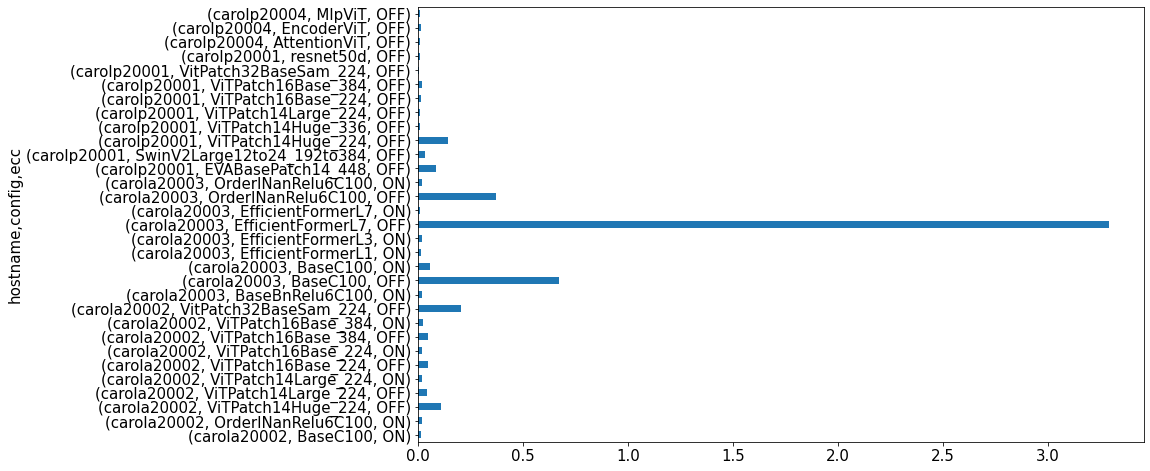

In [115]:
plt.figure(figsize=(13,8))
plt.rcParams.update({'font.size': 15})
to_save["sdc_error_rate"].plot.barh()

<AxesSubplot: ylabel='hostname,config,ecc'>

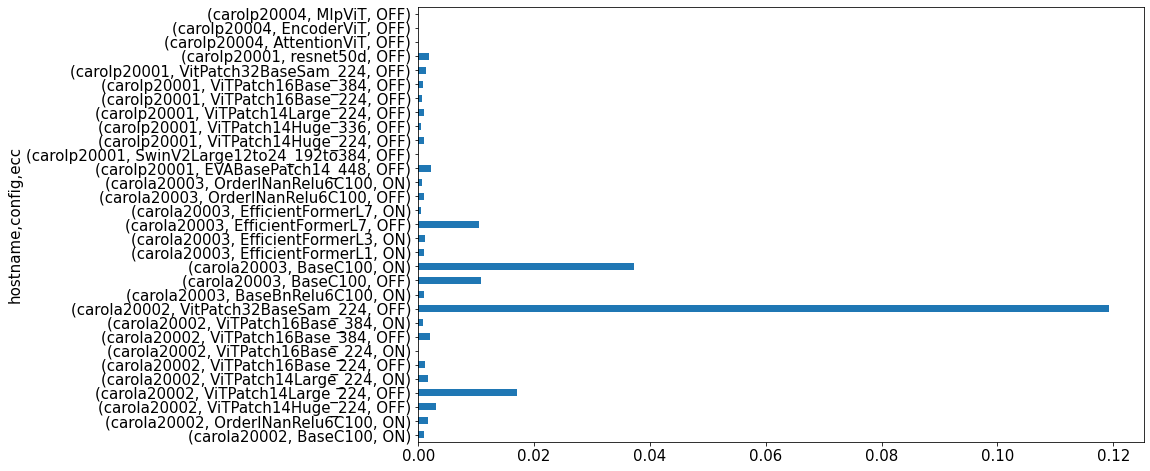

In [116]:
plt.figure(figsize=(13,8))
plt.rcParams.update({'font.size': 15})
to_save["critical_error_rate"].plot.barh()